<a href="https://colab.research.google.com/github/CVH4OYC/computervision/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 12.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a model

model = YOLO("yolo11n.pt")  # pretrained YOLO11n model

In [ ]:

# Run batched inference on a list of images
results = model(["images.jpg"])  # return a list of Results objects


0: 384x640 1 cat, 2 dogs, 166.4ms
Speed: 3.4ms preprocess, 166.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
result=results[0]

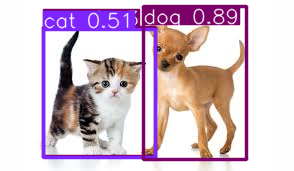

'result.jpg'

In [ ]:
boxes = result.boxes  # Boxes object for bounding box outputs
obb = result.obb  # Oriented boxes object for OBB outputs
result.show()  # display to screen
result.save(filename="result.jpg")  # save to disk

In [ ]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
for box in boxes:
  print(result.names[box.cls.item()])
  print(round(box.conf.item(),2))
  print([round(el,2) for el in box.xyxy.tolist()[0]])

dog
0.89
[143.3, 6.2, 246.51, 159.03]
cat
0.51
[43.95, 29.18, 155.9, 157.49]
dog
0.43
[43.86, 27.94, 155.5, 156.67]


# Задание 2

https://universe.roboflow.com/cv-390lk/-q9pnh (217 размеченных картинок вагонов)

Размечали с Водяником Ростиславом и Голдобиным Денисом четвёртую часть этого датасета https://disk.yandex.ru/d/Dua5LR3EuMmVhg (roboflow автоматически распределил картинки между нами для разметки, поэтому прикреплю скриншот со своей Job)

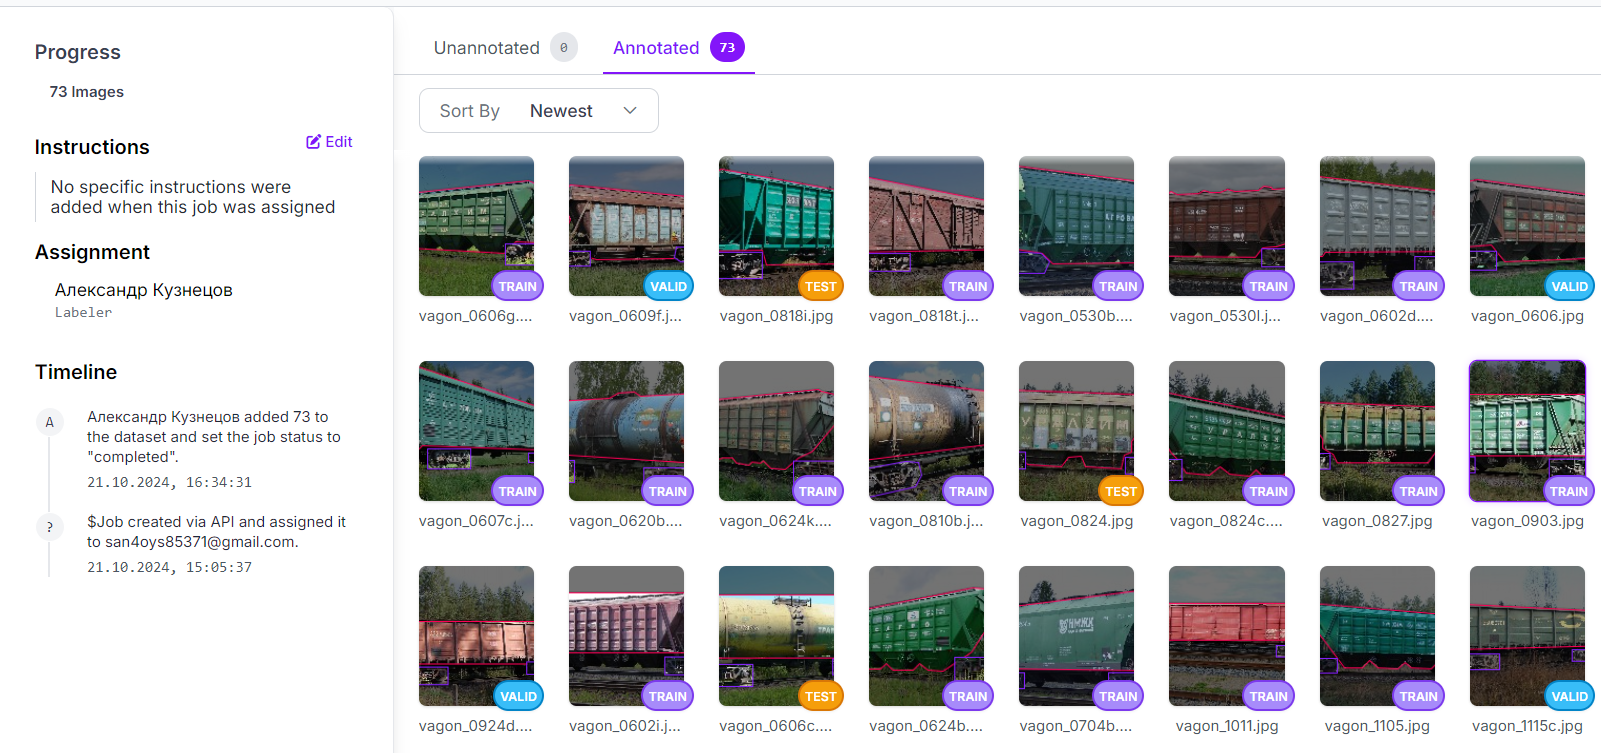

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 12.3 MB/s eta 0:00:00


Качаем датасет с roboflow

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rQie7H5t56dh4MOtTBcL")
project = rf.workspace("cv-390lk").project("test-0kyke")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-1 in yolov11:: 100%|██████████| 4038/4038 [00:02<00:00, 1490.31it/s]


In [6]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolo11m.pt')

# Training.
results = model.train(
   data='/content/test-1/data.yaml',
   imgsz=640,
   epochs=100,
   name='yolov11m_vagons'
)

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/test-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov11m_vagons2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /content/test-1/train/labels.cache... 1766 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1766/1766 [00:00<?, ?it/s]


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3956, len(boxes) = 7314. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/test-1/valid/labels.cache... 165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 165/165 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 375, len(boxes) = 705. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/yolov11m_vagons2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov11m_vagons2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.88G      1.484      1.725      1.644         45        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        165        705      0.227      0.228      0.142     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.15G       1.59      1.587       1.69         49        640: 100%|██████████| 111/111 [01:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        165        705      0.354       0.38        0.3      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.21G      1.589      1.604      1.686         32        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        165        705      0.318      0.402      0.259      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.13G      1.522      1.521      1.627         49        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        165        705       0.71      0.367      0.365      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.19G      1.503      1.461      1.611         35        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        165        705       0.48      0.463      0.444      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.16G       1.44      1.426      1.573         57        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]


                   all        165        705      0.474      0.539      0.462      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       9.2G      1.405      1.373      1.544         46        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        165        705      0.457      0.526      0.456      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.17G      1.397      1.355      1.527         37        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        165        705      0.456       0.53      0.491      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.21G      1.363      1.317       1.51         35        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.502      0.584      0.489      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.19G      1.341      1.298      1.493         55        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        165        705      0.505      0.562      0.497      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.14G        1.3      1.251      1.466         56        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        165        705       0.51      0.552      0.506      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.14G      1.303      1.248      1.472         56        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]


                   all        165        705      0.514      0.574      0.505      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.14G      1.268      1.228      1.453         38        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        165        705       0.47      0.593      0.508      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.16G      1.251      1.215      1.435         32        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        165        705      0.505      0.538      0.491      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.17G      1.249      1.192       1.43         34        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        165        705       0.53      0.566      0.507      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       9.1G      1.235      1.192      1.427         34        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705      0.524      0.597      0.526      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       9.2G       1.22       1.17        1.4         34        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        165        705       0.48      0.601      0.512      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.17G      1.217      1.162      1.407         51        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]


                   all        165        705      0.535      0.531      0.509      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.17G      1.195      1.146      1.392         43        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705      0.521      0.566      0.515      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.01G      1.178      1.138      1.379         52        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]


                   all        165        705      0.503      0.621      0.523      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.16G      1.166      1.126      1.382         58        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        165        705      0.507      0.598      0.525      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.13G       1.16      1.102      1.371         39        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        165        705      0.501      0.558      0.522      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.19G      1.152      1.123      1.374         57        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.508      0.569      0.512      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.16G      1.148      1.094      1.361         46        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.507      0.599      0.515      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.21G      1.123      1.059      1.362         36        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.537      0.589      0.529      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.16G      1.139      1.084      1.358         51        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.482      0.598      0.511      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.19G      1.124      1.066      1.347         41        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        165        705      0.416      0.581      0.489      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.14G      1.107      1.047      1.335         44        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.512      0.601       0.51       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.16G        1.1      1.036      1.334         38        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        165        705      0.528      0.587      0.517      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.16G      1.087      1.034      1.329         44        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]


                   all        165        705      0.541      0.537      0.505       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.17G      1.067      1.024      1.315         68        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705      0.538      0.532      0.512      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.14G      1.063      1.001      1.315         45        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.472      0.602      0.491       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.19G      1.064     0.9937      1.311         29        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        165        705      0.523      0.561      0.494      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.18G      1.055     0.9902      1.305         63        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.526      0.584      0.508      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.13G       1.05     0.9812      1.299         46        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        165        705      0.507      0.578        0.5      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.15G      1.019     0.9571      1.283         38        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.546      0.569      0.527      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.19G      1.019     0.9454       1.28         47        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        165        705      0.548      0.566      0.525       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.17G      1.006     0.9294       1.27         49        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        165        705      0.496      0.582      0.504      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.17G      1.002     0.9333       1.27         59        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.533      0.561      0.511      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.16G     0.9961     0.9129      1.262         33        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.513      0.618      0.522      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.18G      0.982     0.9157       1.26         42        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        165        705      0.513      0.576      0.511      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.15G     0.9757      0.898      1.253         54        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]


                   all        165        705      0.514      0.532      0.496      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.16G     0.9716     0.8994      1.249         39        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        165        705       0.54      0.557      0.516      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.11G     0.9614     0.8748      1.246         43        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        165        705      0.491      0.541      0.485       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.19G      0.958     0.8681      1.245         43        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        165        705      0.518      0.542      0.504       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.17G     0.9501     0.8593      1.234         29        640: 100%|██████████| 111/111 [01:10<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        165        705       0.49      0.583      0.505       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.14G     0.9475     0.8561      1.239         37        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.593       0.51      0.501       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       9.1G      0.936     0.8493      1.225         51        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        165        705      0.575      0.523      0.509      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.16G     0.9291     0.8214      1.215         43        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705       0.52      0.578      0.509      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.17G     0.9096     0.8083       1.21         44        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        165        705      0.535      0.538      0.511      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.14G      0.903     0.8156      1.206         58        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.505      0.557      0.494      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.11G     0.9057      0.802      1.205         53        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        165        705      0.531      0.563      0.506       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.19G     0.8963     0.8001      1.205         36        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        165        705      0.495      0.551      0.493      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.19G     0.9076     0.8021      1.212         30        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705      0.572      0.509      0.502       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       9.2G     0.8876     0.7792      1.199         32        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705       0.49      0.574      0.499       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.05G     0.8882     0.7873      1.196         50        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        165        705      0.545      0.481       0.49      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.21G     0.8561     0.7415      1.173         47        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        165        705      0.509      0.521      0.476      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.16G     0.8462     0.7443      1.167         43        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.518      0.547      0.494      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.19G     0.8608      0.748      1.179         57        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        165        705      0.542      0.486      0.482      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.14G      0.837     0.7314      1.166         38        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705      0.501      0.583      0.495      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       9.2G     0.8363     0.7328      1.169         37        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        165        705      0.545      0.477      0.478      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.16G      0.821     0.7191      1.156         60        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        165        705       0.54      0.524      0.499      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       9.2G     0.8169     0.7128      1.156         35        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        165        705      0.505      0.551      0.499      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.16G     0.8219      0.708      1.162         56        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        165        705      0.565      0.521      0.504      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.21G      0.811     0.7025      1.153         42        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        165        705      0.513      0.519      0.477      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.17G     0.8041      0.695       1.15         39        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705        0.5      0.546       0.49      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.19G     0.7962     0.6875      1.146         37        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        165        705       0.54      0.512      0.484      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.16G     0.7981     0.6915      1.147         72        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        165        705       0.57      0.484      0.481      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.18G     0.7807      0.676      1.129         49        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]


                   all        165        705      0.513      0.506      0.477       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.19G     0.7789     0.6713      1.137         41        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        165        705      0.507      0.539      0.481      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.15G     0.7745     0.6655      1.132         54        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        165        705        0.5      0.527      0.475      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       9.1G     0.7582     0.6447      1.119         44        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        165        705      0.512      0.528      0.484      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.18G     0.7554     0.6518      1.114         38        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        165        705      0.484      0.585      0.492      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.07G     0.7478     0.6413      1.116         42        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        165        705      0.542      0.509      0.498      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.17G     0.7348     0.6275      1.104         59        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all        165        705      0.545      0.507      0.487      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.14G     0.7479     0.6225       1.11         28        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        165        705      0.539      0.483      0.471      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       9.2G     0.7352     0.6163      1.109         46        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.554      0.492      0.476      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.19G     0.7234     0.6026      1.097         47        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        165        705      0.545      0.515      0.492      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.21G     0.7077     0.6005       1.09         37        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        165        705       0.53      0.498      0.473      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.14G     0.7097     0.6014      1.096         27        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]


                   all        165        705      0.575      0.475      0.481      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.21G     0.6956     0.5812      1.083         33        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        165        705      0.551      0.523      0.492      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.19G     0.6942     0.5828      1.081         53        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.527      0.519      0.475      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       9.2G     0.6927     0.5824      1.085         47        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        165        705      0.541      0.505      0.483      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.14G     0.6835     0.5667      1.074         54        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.555      0.498      0.486      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.17G     0.6864     0.5662      1.073         47        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.526       0.52      0.483      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.17G     0.6738     0.5642      1.073         40        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        165        705      0.497      0.526      0.463      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       9.2G      0.674     0.5638      1.072         62        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.526      0.529      0.493      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.14G     0.6572     0.5506      1.061         42        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        165        705      0.537       0.53      0.486      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.18G     0.6644     0.5505      1.063         36        640: 100%|██████████| 111/111 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        705      0.529      0.538      0.483      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.14G     0.6518     0.5354      1.057         47        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        165        705      0.565      0.508      0.494      0.325


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.15G      0.626     0.4761      1.055         22        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705      0.532      0.517      0.486      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.11G     0.5962     0.4413      1.035         23        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705      0.532      0.536       0.49      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.16G     0.5873     0.4325      1.028         23        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        165        705      0.524      0.525      0.484      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.14G     0.5875     0.4288      1.031         23        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        165        705      0.533      0.507      0.479      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.16G     0.5664     0.4162      1.014         23        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        165        705      0.521      0.511      0.485       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.12G     0.5708     0.4169      1.013         24        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        165        705      0.529      0.515      0.482      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.15G     0.5515     0.4047      1.008         22        640: 100%|██████████| 111/111 [01:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        165        705      0.548      0.492      0.483      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.15G     0.5451     0.3949      1.001         24        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        165        705      0.541      0.492      0.483      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.16G     0.5453     0.3967      1.001         17        640: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        165        705      0.585      0.458      0.478      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.12G     0.5405       0.39     0.9912         21        640: 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        165        705      0.565      0.474      0.478      0.319



100 epochs completed in 2.141 hours.
Optimizer stripped from runs/detect/yolov11m_vagons2/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/yolov11m_vagons2/weights/best.pt, 40.5MB

Validating runs/detect/yolov11m_vagons2/weights/best.pt...
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]


                   all        165        705      0.507      0.598      0.524      0.346
                  body        164        223      0.833      0.892      0.922      0.678
              coupling         89        107      0.249      0.234      0.163     0.0875
                wheels        164        375      0.439      0.669      0.489      0.274
Speed: 0.5ms preprocess, 12.3ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/yolov11m_vagons2


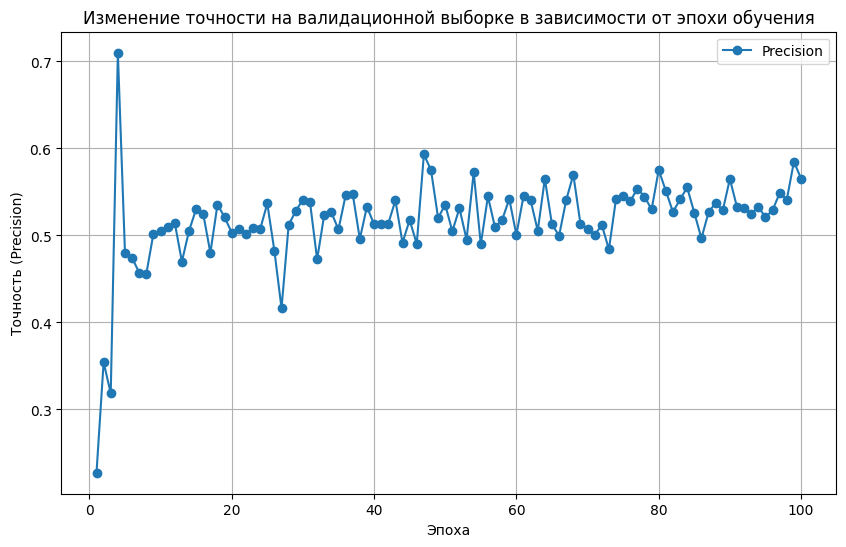

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение CSV файла с результатами обучения
df = pd.read_csv('/content/runs/detect/yolov11m_vagons/results.csv')

# Получаем номера эпох и значения метрики precision
epochs = df['epoch']
precision = df['metrics/precision(B)']

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(epochs, precision, marker='o', label='Precision')

# Настройка графика
plt.title('Изменение точности на валидационной выборке в зависимости от эпохи обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность (Precision)')
plt.legend()
plt.grid(True)
plt.show()



best.pt сохранена, при необходимости закидываем её в хранилище по ниже указанному пути (для Colab)

In [19]:
best_model = YOLO('/content/best.pt')

In [25]:
best_model.names

{0: 'body', 1: 'coupling', 2: 'wheels'}

Функция для вывода результатов детекции

In [20]:
def resultDetection(fileName):
  results = best_model([f"/content/Images/{fileName}"])
  result=results[0]
  boxes = result.boxes  # Boxes object for bounding box outputs
  obb = result.obb  # Oriented boxes object for OBB outputs
  result.show()  # display to screen
  result.save(filename=f"result_{fileName}")  # save to disk
  for box in boxes:
    print(result.names[box.cls.item()])
    print(round(box.conf.item(),2))
    print([round(el,2) for el in box.xyxy.tolist()[0]])

Перебираем загруженные картинки и закидываем их в resultDetection

Картинка vagon_5.jpg...

0: 448x640 5 bodys, 3 wheelss, 57.3ms
Speed: 2.7ms preprocess, 57.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


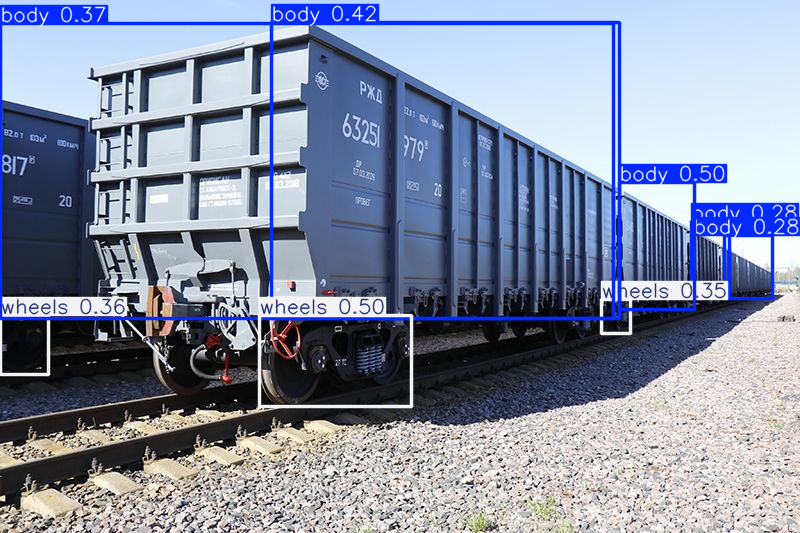

body
0.5
[619.35, 182.62, 694.52, 309.9]
wheels
0.5
[259.03, 315.84, 411.94, 406.57]
body
0.42
[271.87, 22.08, 619.31, 318.45]
body
0.37
[0.0, 23.45, 613.26, 318.46]
wheels
0.36
[0.65, 315.56, 48.5, 374.88]
wheels
0.35
[601.21, 299.57, 630.59, 333.28]
body
0.28
[724.86, 235.61, 772.05, 298.66]
body
0.28
[691.73, 221.28, 729.82, 297.97]
Картинка vagon_4.jpg...

0: 448x640 4 bodys, 2 wheelss, 29.9ms
Speed: 1.9ms preprocess, 29.9ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


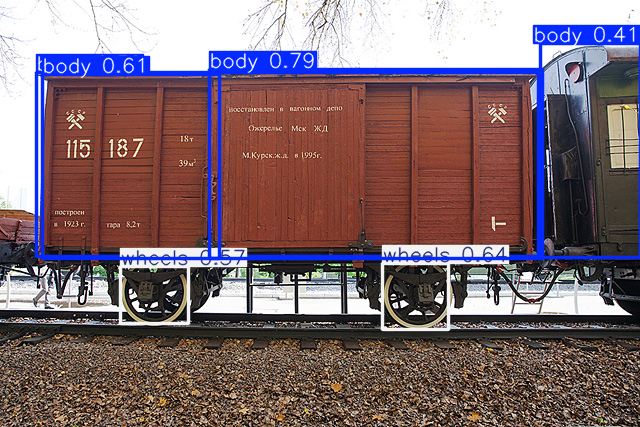

body
0.79
[209.84, 69.58, 542.07, 258.73]
wheels
0.64
[382.79, 263.01, 448.59, 329.35]
body
0.61
[42.51, 74.29, 219.51, 258.77]
wheels
0.57
[120.08, 266.07, 188.93, 323.93]
body
0.41
[540.08, 43.84, 640.0, 257.29]
body
0.3
[36.02, 72.26, 538.15, 256.15]
Картинка vagon_1.jpg...

0: 480x640 1 body, 3 wheelss, 30.5ms
Speed: 3.9ms preprocess, 30.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


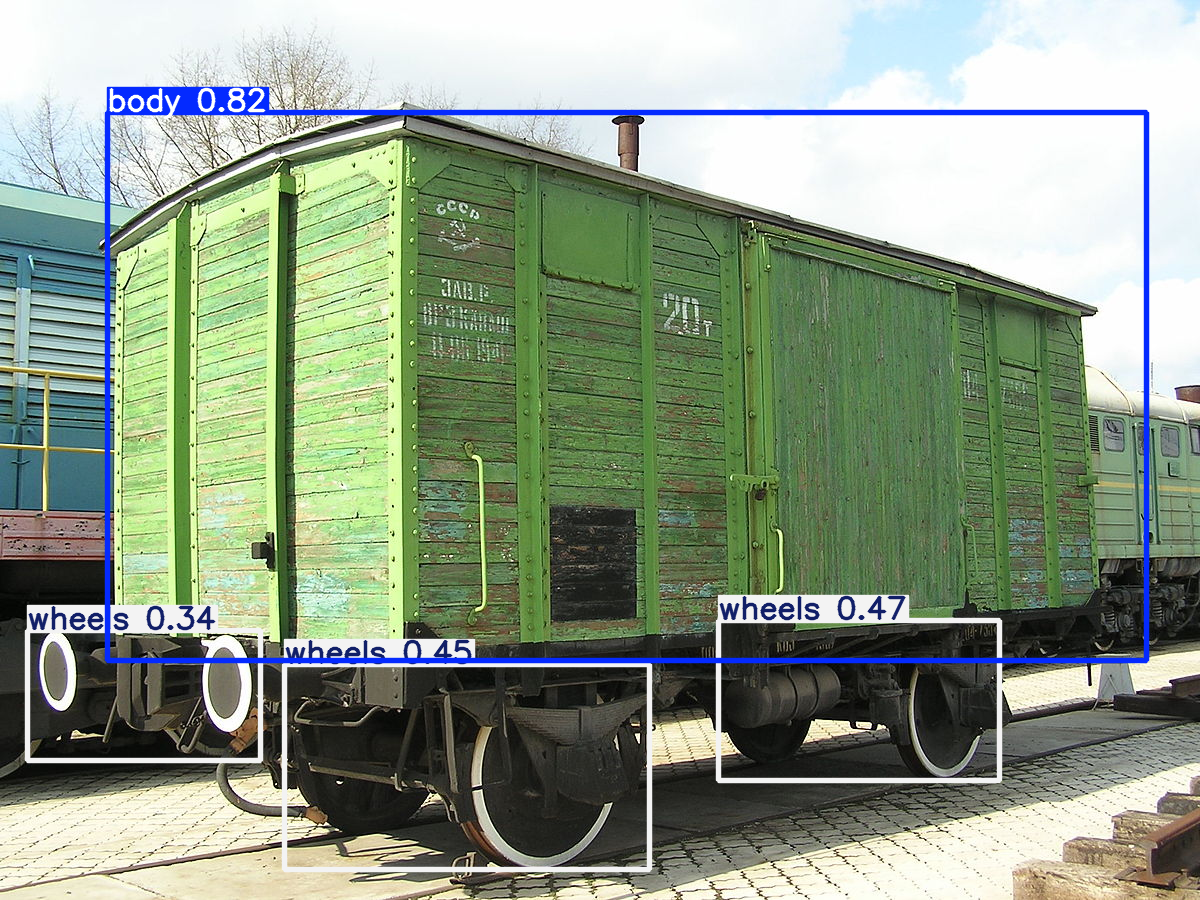

body
0.82
[107.01, 112.81, 1146.68, 660.26]
wheels
0.47
[718.96, 620.17, 999.49, 780.57]
wheels
0.45
[284.99, 664.2, 649.12, 869.51]
wheels
0.34
[27.11, 630.33, 260.63, 760.67]
Картинка vagon_3.jpg...

0: 352x640 1 body, 2 wheelss, 77.9ms
Speed: 3.0ms preprocess, 77.9ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)


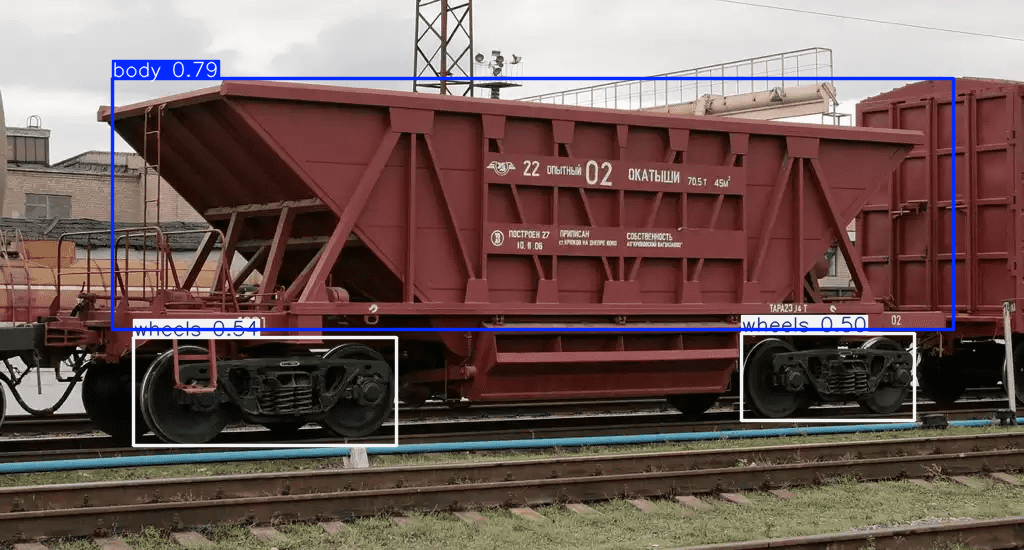

body
0.79
[112.06, 78.16, 953.97, 329.12]
wheels
0.54
[133.69, 337.99, 396.47, 445.73]
wheels
0.5
[741.74, 333.66, 914.63, 420.35]
Картинка vagon_2.jpg...

0: 448x640 1 body, 1 wheels, 30.7ms
Speed: 2.4ms preprocess, 30.7ms inference, 5.6ms postprocess per image at shape (1, 3, 448, 640)


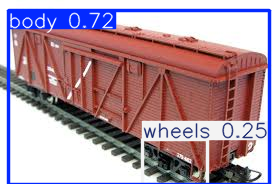

body
0.72
[8.76, 10.41, 269.12, 184.0]
wheels
0.25
[142.02, 139.25, 207.42, 184.0]


In [22]:
import os
image_folder = "/content/Images"

# Перебор всех файлов в папке
for file_name in os.listdir(image_folder):
    # Проверяем, является ли файл изображением (например, с расширением .jpg или .png)
    if file_name.endswith(('.jpg', '.jpeg', '.png')):
        print(f"Картинка {file_name}...")
        # Передаем имя файла в функцию
        resultDetection(file_name)

Нигде не определилась сцепка, тело вагона в некоторых случаях определяется по несколько раз

Ради эксперимента дадим модели фотографию, на которой есть только сцепка


0: 352x640 1 wheels, 30.4ms
Speed: 3.5ms preprocess, 30.4ms inference, 2.2ms postprocess per image at shape (1, 3, 352, 640)


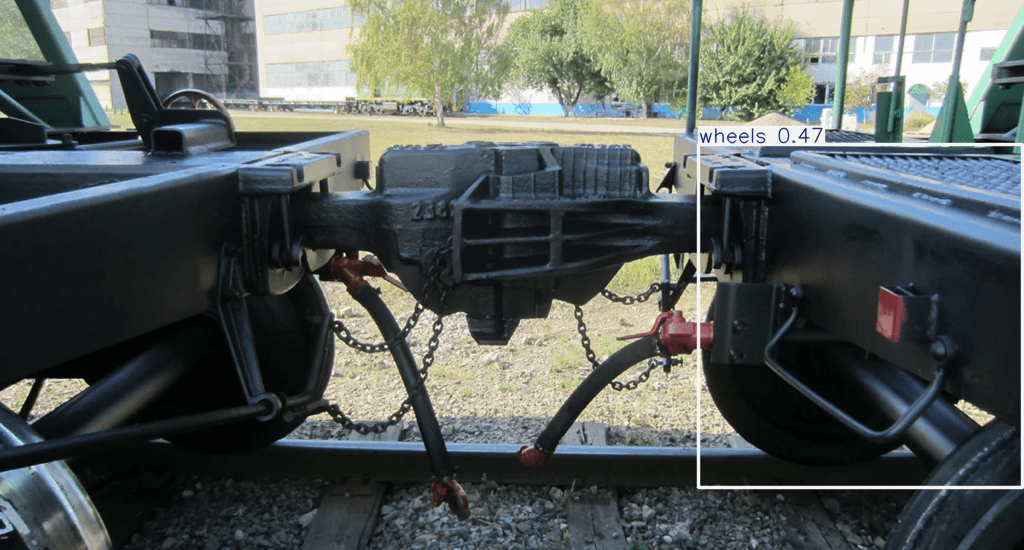

wheels
0.47
[698.98, 144.13, 1022.68, 487.19]


In [24]:
resultDetection("scepka.jpg")

Скорее всего, не определяет этот класс из-за плохой разметки